In [63]:
# NOTE - REMEMBER TO UPDATE THE CSV AND RINK IMAGE LINKS TO THE FILES UPLOADED TO GIT HUB

In [1]:
# Importing the necessary packages for this section

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib as plt
import matplotlib.image as mpimg
rink_img = mpimg.imread(r'C:\Users\zomgj\Downloads\hockey_rink.png') # this is an image background for shot charts

In [5]:
import seaborn as sns

In [6]:
# Import the relevant dataset


In [7]:
shots_df = pd.read_csv(r'C:\Users\zomgj\Downloads\shots_2021.csv')

In [8]:
shots_df.head()

,shotID,arenaAdjustedShotDistance,arenaAdjustedXCord,arenaAdjustedXCordABS,arenaAdjustedYCord,arenaAdjustedYCordAbs,averageRestDifference,awayEmptyNet,awayPenalty1Length,awayPenalty1TimeLeft,...,xCordAdjusted,xFroze,xGoal,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xRebound,xShotWasOnGoal,yCord,yCordAdjusted
0,0,42.520583,61.0,61.0,-32.0,32.0,-8.4,0,0,0,...,61,0.202514,0.009192,0.445979,0.289830,0.023891,0.028594,0.718082,-32,-32
1,1,30.610456,-65.0,65.0,19.0,19.0,21.4,0,0,0,...,65,0.285948,0.031353,0.303080,0.325607,0.026384,0.027629,0.793188,19,-19
2,2,85.381497,-8.0,8.0,-27.0,27.0,3.8,0,0,0,...,8,0.161225,0.012753,0.307661,0.486296,0.019218,0.012846,0.840122,-27,27
3,3,29.274562,-60.0,60.0,-4.0,4.0,0.0,0,0,0,...,60,0.161623,0.121753,0.374061,0.264891,0.024508,0.053163,0.729294,-4,4
4,4,26.305893,63.0,63.0,4.0,4.0,0.0,0,0,0,...,63,0.116379,0.088392,0.432747,0.284554,0.018850,0.059078,0.695010,4,4


In [9]:
shots_df.set_index('shotID', inplace=True) # shotID is already a functionl index, so I will set it as such


In [26]:
# There is a vast amount of information here. For my purposes, I'm interested in ShotID Shot Distance, Shot x and Y Coordinates, Shot type, Shot outcome and the shooting player's position

shot_info = shots_df[['shotDistance', 'xCordAdjusted', 'yCordAdjusted','shotType', 'event', 'playerPositionThatDidEvent']]
shot_info.head()

,shotDistance,xCordAdjusted,yCordAdjusted,shotType,event,playerPositionThatDidEvent
shotID,,,,,,
0,42.520583,61,-32,WRIST,SHOT,C
1,30.610456,65,-19,WRIST,SHOT,L
2,85.381497,8,27,WRIST,SHOT,D
3,29.274562,60,4,WRIST,SHOT,L
4,26.305893,63,4,WRIST,SHOT,L


In [27]:
# These column names are not as clean or informative as they could be, so I will tidy them up.

shot_info_rename = shot_info.rename(columns={'event': 'Shot Outcome','playerPositionThatDidEvent': 'Shooter Position', 'xCordAdjusted': 'xCord', 'yCordAdjusted': 'yCord'})
shot_info_rename.head()

,shotDistance,xCord,yCord,shotType,Shot Outcome,Shooter Position
shotID,,,,,,
0,42.520583,61,-32,WRIST,SHOT,C
1,30.610456,65,-19,WRIST,SHOT,L
2,85.381497,8,27,WRIST,SHOT,D
3,29.274562,60,4,WRIST,SHOT,L
4,26.305893,63,4,WRIST,SHOT,L


In [12]:
# Cleaning the Data
# I will check the shot_info df for missing data. It is not expected to find significant missing data as this datset is highly curated by Moneypuck.com
# I will not check for duplicates as each shot recorded has already been assigned a unique ID. It is not expected that there is any duplication of shots, and many individual shotIDs might share the same information. Therefore, dropping duplicates would incorrectly reduce the dataset.

In [13]:
# checking for missing values
missing_values = shot_info_rename.isnull().sum()
missing_values.head()

shotDistance    0
xCord           0
yCord           0
shotType        5
Shot Outcome    0
dtype: int64

In [29]:
# dropping the rows where the shotType is missing. since the number of missing values is tiny in the context of the dataset, I will not attempt to fill them.
# however, if I were to do so, a bfill method might be appropriate - shot_info.fillna(method='bfill', axis=0).fillna(0)

shot_info_rename.dropna()


,shotDistance,xCord,yCord,shotType,Shot Outcome,Shooter Position
shotID,,,,,,
0,42.520583,61,-32,WRIST,SHOT,C
1,30.610456,65,-19,WRIST,SHOT,L
2,85.381497,8,27,WRIST,SHOT,D
3,29.274562,60,4,WRIST,SHOT,L
4,26.305893,63,4,WRIST,SHOT,L
...,...,...,...,...,...,...
73,30.463092,61,-12,SNAP,SHOT,R
74,16.278821,73,-3,TIP,MISS,C
75,41.194660,48,-4,SNAP,MISS,C


In [ ]:
# Mapping shots in a scatter plot, where the x value is the horizontal distance from the goal line and the y value is the y value is the vertical distance from centre-ice

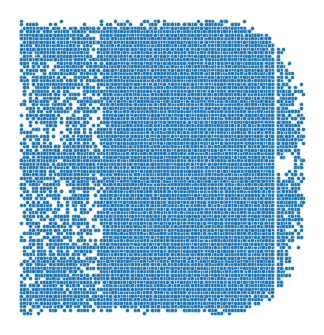

In [39]:
shot_chart = sns.relplot(data=shot_info_rename, x='xCord', y='yCord', kind='scatter', s=15)
shot_chart.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
shot_chart.despine(left=True, bottom=True)


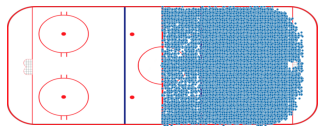

In [40]:
# This resembles a shot distribution nomralised to one side of the ice rink. Adding the ice-rink visual to make sense of the shot distribution

shot_chart = sns.relplot(data=shot_info_rename, x='xCord', y='yCord', kind='scatter', s=5)
shot_chart.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
shot_chart.despine(left=True, bottom=True)
for ax in shot_chart.fig.axes:
    ax.imshow(rink_img, zorder=0, extent=[-110, 110, -42, 42])

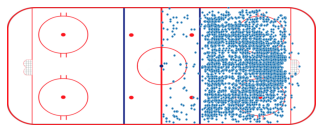

In [59]:
# It is difficult to make sense of the data with this visualisation as we are mapping c. 120,000 shots to a limited area. 
# Accordingly, almost all possible x and y coordinate pairs will be visualised
# In order to make sense of the data, I will cut the shot sample size down to the first 3,500 shots from the shot_info_rename dataframe

shot_info_reduced = shot_info_rename.iloc[0:3501, :]

shot_chart_reduced = sns.relplot(data=shot_info_reduced, x='xCord', y='yCord', kind='scatter', s=5)
shot_chart_reduced.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
shot_chart_reduced.despine(left=True, bottom=True)
for ax in shot_chart_reduced.fig.axes:
    ax.imshow(rink_img, zorder=0, extent=[-110, 110, -42, 42])


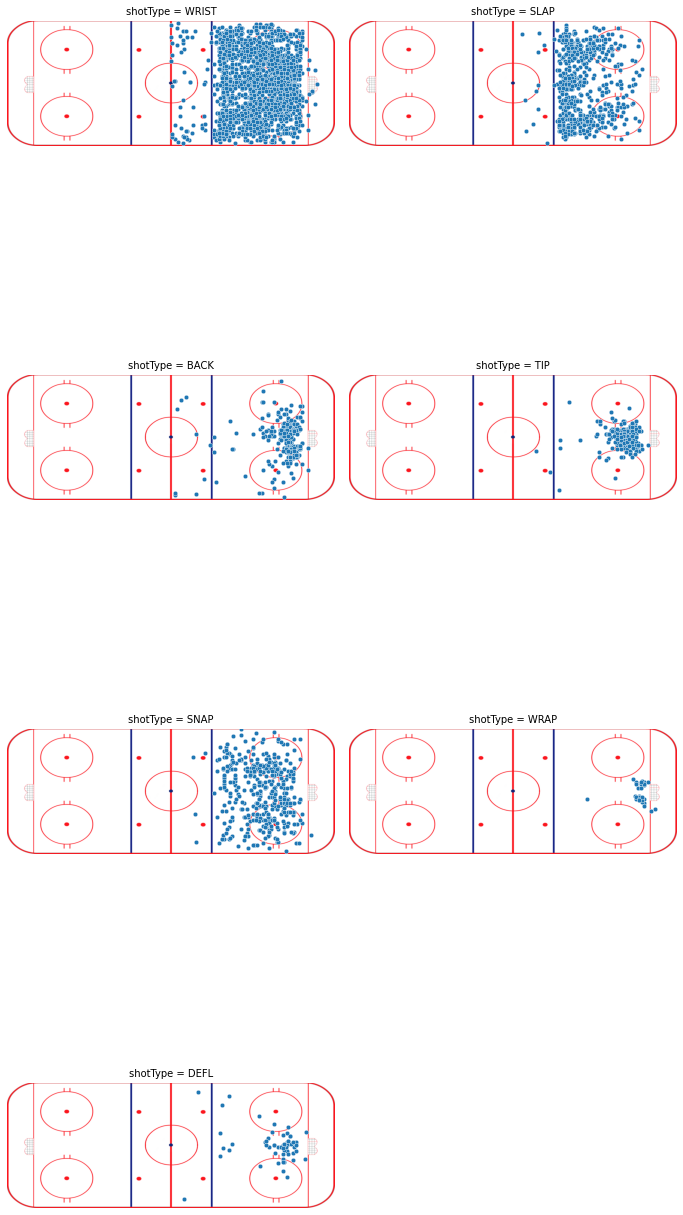

In [62]:
slap_shot_chart = sns.relplot(data=shot_info_reduced,col = 'shotType',col_wrap=2, x='xCord', y='yCord', kind='scatter', s=20)
slap_shot_chart.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
slap_shot_chart.despine(left=True, bottom=True)
for ax in slap_shot_chart.fig.axes:
    ax.imshow(rink_img, zorder=0, extent=[-110, 110, -42, 42])